In [69]:
import pandas as pd
import numpy as np
import calendar
import datetime as dt
from IPython.display import display,HTML
from calendar import HTMLCalendar
from matplotlib import pyplot as plt
import seaborn as sns

! pip install calplot
import calplot

     |████████████████████████████████| 132 kB 4.6 MB/s eta 0:00:01
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=71830ca96c45c8f69dfd231f0ecf77c496bc219f7ddd5d330dbd193e533b6f85
  Stored in directory: /Users/yuhanwang/Library/Caches/pip/wheels/a4/51/68/89dbd39aa6abbe8e34f410a810421335b157fb162b99841c30
Successfully built calplot


In [2]:
nrt_l3 = pd.read_csv("copernicus_data_nrt_l3.csv")
nrt_l4 = pd.read_csv("copernicus_data_nrt_l4.csv")

In [3]:
nrt_l3

,time,lat,lon,SPM,TUR,CHL,site
0,2022-01-01,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
1,2022-01-02,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
2,2022-01-03,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
3,2022-01-04,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
4,2022-01-05,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
...,...,...,...,...,...,...,...
156945,2022-12-27,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156946,2022-12-28,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156947,2022-12-29,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156948,2022-12-30,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!


In [4]:
nrt_l4

,time,lat,lon,SPM,TUR,CHL,site
0,2022-01-03,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
1,2022-01-04,54.664352,-1.185360,15.024445,24.266914,9.183625,Seaton Carew North
2,2022-01-05,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
3,2022-01-06,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
4,2022-01-07,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
...,...,...,...,...,...,...,...
120825,2022-10-25,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
120826,2022-10-26,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
120827,2022-10-29,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
120828,2022-10-30,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!


In [5]:
365 * 430

156950

#### Visualise Dates

In [59]:
percentage_list = []
for time in nrt_l4['time'].unique():
    lst = [time]
    data = nrt_l4[nrt_l4['time'] == time]
    percentage = (len(data[data['SPM'].isnull() == True])/len(data))*100
    lst.append(percentage)
    percentage_list.append(lst)

In [78]:
pct = pd.DataFrame(percentage_list, columns = ['time','Percentage'])
pct['time'] = pd.to_datetime(pct['time'])
pct = pct.set_index('time')
pct

,Percentage
time,
2022-01-03,90.697674
2022-01-04,88.604651
2022-01-05,100.000000
2022-01-06,91.627907
2022-01-07,100.000000
...,...
2022-10-25,90.930233
2022-10-26,87.441860
2022-10-29,100.000000


(<Figure size 1872x216 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

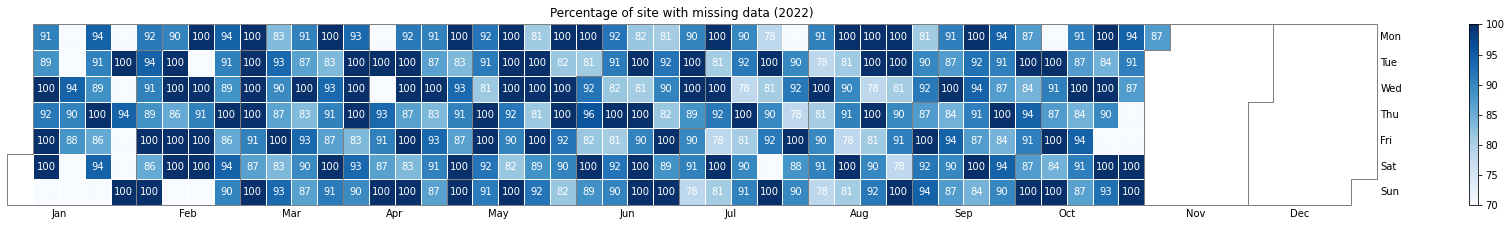

In [135]:
calplot.calplot(data = pct['Percentage'],how = 'sum', cmap = 'Blues',vmin = 70, yearlabels = False,
                figsize = (26, 3), textformat='{:.0f}', textcolor = 'White', fillcolor='w', suptitle = "Percentage of site with missing data (2022)")

In [6]:
all_dates = nrt_l3[nrt_l3['site'] == 'Seaton Carew North']['time']
# all_dates = pd.date_range(start="2022-01-01",end='2022-12-31') # equivalent to above
l4_dates = nrt_l4[nrt_l4['site'] == 'Seaton Carew North']['time']
missing_dates = set(all_dates) - set(l4_dates)

In [7]:
class HighlightedCalendar(HTMLCalendar):
    def __init__(self, highlight=[], *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._highlight = highlight
    
    def formatday(self, day, weekday):
        """
        Return a day as a table cell.
        """
        if day in self._highlight:
            return '<td class="%s" bgcolor="pink">%d</td>' % (self.cssclasses[weekday], day)
        else:
            return super().formatday(day, weekday)

def display_missing_dates(missing_dates):
    dates_dict = {key: [] for key in np.arange(1,13)}
    for date in list(missing_dates):
        date_dt = dt.datetime.strptime(date, '%Y-%m-%d')
        month = date_dt.month
        day = date_dt.day
        dates_dict[month].append(day)
      
    for i in np.arange(1,13):
        highlight = dates_dict[i]
        display(HTML(HighlightedCalendar(highlight=highlight).formatmonth(2022, i)))

In [8]:
display_missing_dates(missing_dates)

# Join L3 and L4 tables to compare available data

In [9]:
merged_df = pd.merge(nrt_l3, nrt_l4, how='left', left_on=['time','site'], right_on=['time','site'], suffixes=('_l3', '_l4'))

In [10]:
merged_df[merged_df['site'] == 'Seaton Carew North'].dropna(how='all',subset=['SPM_l3', 'TUR_l3', 'CHL_l3', 'SPM_l4','TUR_l4','CHL_l4'])[0:20]

,time,lat_l3,lon_l3,SPM_l3,TUR_l3,CHL_l3,site,lat_l4,lon_l4,SPM_l4,TUR_l4,CHL_l4
3,2022-01-04,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,15.024445,24.266914,9.183625
13,2022-01-14,54.664352,-1.18536,14.042665,22.756594,4.884795,Seaton Carew North,54.664352,-1.18536,14.001681,22.287258,7.396690
18,2022-01-19,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,15.979074,26.295628,9.396184
20,2022-01-21,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,16.508050,26.571064,9.605638
33,2022-02-03,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,22.796183,32.771637,10.463064
35,2022-02-05,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,24.198017,31.099745,9.995237
40,2022-02-10,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,27.687624,30.686600,8.867917
53,2022-02-23,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,24.914480,37.056866,9.696615
55,2022-02-25,54.664352,-1.18536,22.437294,35.101610,14.003212,Seaton Carew North,54.664352,-1.18536,22.524345,34.409634,9.732672
63,2022-03-05,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North,54.664352,-1.18536,15.891138,23.917894,7.217190


In [11]:
merged_df[merged_df['site'] == 'West Bay (West)'] \
.dropna(how='all',subset=['SPM_l3', 'TUR_l3', 'CHL_l3', 'SPM_l4','TUR_l4','CHL_l4'])

,time,lat_l3,lon_l3,SPM_l3,TUR_l3,CHL_l3,site,lat_l4,lon_l4,SPM_l4,TUR_l4,CHL_l4


In [12]:
len(merged_df[merged_df['site'] == 'West Bay (West)'] \
.dropna(how='all',subset=['SPM_l3', 'TUR_l3', 'CHL_l3', 'SPM_l4','TUR_l4','CHL_l4']))

0

# How many sites don't have any datapoints at all? (L3 / L4)

In [13]:
site_names = nrt_l3['site'].unique()

In [14]:
values = []
for site in site_names:
    df = merged_df[merged_df['site'] == site] \
.dropna(how='all',subset=['SPM_l3', 'TUR_l3', 'CHL_l3', 'SPM_l4','TUR_l4','CHL_l4'])
    values.append(len(df))

In [15]:
pd.Series(values).value_counts()

0     269
39     17
90     15
89     14
59      9
91      8
88      8
69      7
92      6
31      5
10      4
70      4
20      3
51      3
29      3
32      3
19      3
43      3
93      3
41      3
21      3
60      3
14      2
53      2
68      2
52      2
75      2
54      2
78      2
45      1
1       1
81      1
61      1
58      1
12      1
42      1
80      1
38      1
33      1
55      1
25      1
13      1
67      1
46      1
57      1
73      1
87      1
50      1
9       1
dtype: int64